In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Load Dataset of review
chunksize = 1000
dfs = []
for df in pd.read_json('../data_set/yelp_academic_dataset_review.json', lines=True, chunksize=chunksize):
    dfs.append(df)
df_review = pd.concat(dfs, ignore_index=True)
df_review.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
#Get number of unique buisnesses
businesses = df_review['business_id'].unique()
print('Number of unique businesses: ', len(businesses))

Number of unique businesses:  150346


Code to display the distribution of review rating for a specific buisness

0          XQfwVwDr-v0ZS3_CbbE5Xw
1          7ATYjTIgM3jUlt4UM3IypQ
2          YjUWPpI6HXG530lwP-fb2A
3          kxX2SOes4o-D3ZQBkiMRfA
4          e4Vwtrqf-wpJfwesgvdgxQ
                    ...          
6990275    jals67o91gcrD4DC81Vk6w
6990276    2vLksaMmSEcGbjI5gywpZA
6990277    R1khUUxidqfaJmcpmGd4aw
6990278    Rr9kKArrMhSLVE9a53q-aA
6990279    VAeEXLbEcI9Emt9KGYq9aA
Name: business_id, Length: 6990280, dtype: object


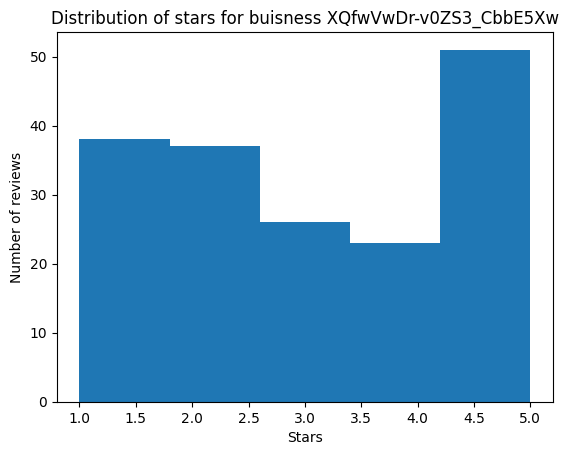

In [4]:
df_buisness = df_review['business_id'].copy()
print(df_buisness)
# Loop through all buisness and for each of them plot the distribution of stars
for i in range(0, len(df_buisness)):
    df_review_buisness = df_review[df_review['business_id'] == df_buisness[i]]
    #print(df_review_buisness)
    df_review_buisness['stars'].plot.hist(bins=5)
    plt.xlabel('Stars')
    plt.ylabel('Number of reviews')
    plt.title('Distribution of stars for buisness ' + str(df_buisness[i]))
    plt.show()
    break

Code to filter buisness and select only the one that has more than 1000 review

In [5]:
# Group by business_id to get rating distribution and review count
df_review_filtered = df_review.groupby('business_id').agg(
    average_rating=('stars', 'mean'),
    rating_count=('stars', 'count')
).reset_index()

df_review_filtered.head()
df_review_filtered = df_review_filtered[df_review_filtered['rating_count'] > 100]
df_review_filtered

,business_id,average_rating,rating_count
39,-02xFuruu85XmDn2xiynJw,4.685950,121
42,-09Oc2D14vRnmirPh0vlXw,3.021898,137
46,-0FX23yAacC4bbLaGPvyxw,3.588571,175
47,-0G_6-KFGpCpxTUlVXCMYQ,3.577922,154
51,-0TffRSXXIlBYVbb5AwfTg,4.355124,1132
...,...,...,...
150294,zyPz0xvE5XkeCVH2J7g2gw,3.693103,290
150305,zymvTQ12tRy3bzmP4tPgOg,4.113757,378
150316,zz0l4dUf28wzPAaTdGqsSw,4.475138,181
150318,zz3E7kmJI2r2JseE6LAnrw,3.718447,103


In [6]:
# Analyze buisness using D-Tale with more than 100 reviews
temp = df_review[df_review['business_id'] == "MUTTqe8uqyMdBl186RmNeA"]
reviews = temp['text'].values
# load reviews in a file so that it is readable
with open('reviews.txt', 'w') as f:
    for review in reviews:
        f.write(review + '\n')
        f.write('-----------------------------------\n')


In [7]:
# Get the dataset business
chunksize = 1000
dfs = []
for df in pd.read_json('../data_set/yelp_academic_dataset_business.json', lines=True, chunksize=chunksize):
    dfs.append(df)
df_business = pd.concat(dfs, ignore_index=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


There is 52 268 restaurants in the dataset

In [8]:
# Filter the business to only get the business with categories food
df_business_food = df_business[df_business['categories'].str.contains('Restaurants', na=False)]
# df_business_food = df_business[df_business['review_count'] > 100]
restaurants = df_business_food['business_id'].unique()



In [9]:
def get_df(df_reviews, df_restaurants, review_threshold, restaurant_threshold=1000):
    df_resto = df_restaurants[df_restaurants['categories'].str.contains('Restaurants', na=False)]
    df_reviews_restaurants = df_reviews[df_reviews['business_id'].isin(df_resto['business_id'])]
    df_review_filtered = df_reviews_restaurants.groupby('business_id').agg(
        average_rating=('stars', 'mean'),
        rating_count=('stars', 'count'),
        median_rating=('stars', 'median')
    ).reset_index()
    df_sup_t = df_review_filtered[df_review_filtered['rating_count'] > review_threshold]
    dfs = []
    nb_reviews = 0
    for i in range(1,6):
        temp = df_sup_t[(df_sup_t['median_rating'] == i) & (df_sup_t['average_rating'] >= i - 0.5) & (df_sup_t['average_rating'] <= i + 0.5)]
        temp = temp.head(restaurant_threshold // 5)
        nb_reviews += temp['rating_count'].sum()
        dfs.append(temp)
    df_sup_t = pd.concat(dfs)

    df_low_t = df_review_filtered[df_review_filtered['rating_count'] <= review_threshold]
    dfs = []
    for i in range(1,6):
        offset = 10
        target = nb_reviews // (5 - i + 1)
        temp = df_low_t[(df_low_t['median_rating'] == i) & (df_low_t['average_rating'] >= i - 0.5) & (df_low_t['average_rating'] <= i + 0.5)]
        res = temp.head(restaurant_threshold // 5 + offset)
        while target > res['rating_count'].sum() and res.shape[0] < restaurant_threshold // 5 + offset:
            print("in iteration:", i)
            print("actual count:", res['rating_count'].sum())
            print("actual target:", target)
            offset += 10
            res = temp.head(restaurant_threshold // 5 + offset)
        nb_reviews -= res['rating_count'].sum()
        dfs.append(temp)
    df_low_t = pd.concat(dfs)

    df_res = pd.concat([df_sup_t, df_low_t])
    df = df_reviews_restaurants[df_reviews_restaurants['business_id'].isin(df_res['business_id'])]
    return df

With the following parameter we have around 860 000 reviews (858 995) for 21723 restaurents

In [11]:
df = get_df(df_review, df_business, 100)
df
df.business_id.unique()

array(['04UD14gamNjLY0IDYVhHJg', 'MWmXGQ98KbRo3vsS5nZhMA',
       'kq5Ghhh14r-eCxlVmlyd8w', ..., 'x2GJf-ooT8CCtkr-ddUCNA',
       'Y5gyxnQt44B3axgzrjttlw', 'Tj9FmBCHd84kjAE9vcoBnw'],
      shape=(21723,), dtype=object)

In [ ]:
print(len(df.business_id.unique()))
df

21723


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
28,DyrAIuKl60j_X8Yrrv-kpg,mNsVyC9tQVYtzLOCbh2Piw,MWmXGQ98KbRo3vsS5nZhMA,5,1,0,0,I recently had dinner here with my wife over t...,2014-10-27 02:47:28
38,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
40,mO398Ed5dpv1H5ZsKc8KXw,yobeeTUBfaTBcnk26mXNuA,hKameFsaXh9g8WQbv593UA,4,0,0,0,Food was good- atmosphere/decor is like a fish...,2015-04-15 15:30:48
59,nAE4IGJMRxDfas0qYabMWw,GtqEcbHF-WTfKlms9250ZQ,7wQEzj-0yOpLiANNLuUflQ,4,1,0,0,Excellent service! Great diner food and breakf...,2016-10-26 16:35:21
...,...,...,...,...,...,...,...,...,...
6990222,FeghE6yk5hmgGFYYqkr5-Q,HiRGRdbSbR7btUmWuZ4_IQ,-5UQGwUZWUhPi5pJlcwEYA,4,2,0,0,"The box lunch is my favorite take out lunch, a...",2016-11-05 20:28:20
6990235,ZcEx4UEnTnR_TEPEqwkKjA,gkg9VqsxPCgpfYXO1dl8CA,Ea663rIHyKXz2VP2DPH7Cg,4,3,0,0,I decided to try this place out after Christma...,2020-01-13 04:21:38
6990251,A5uNiAOGcU0M34sSGN6Wkg,JWhZs-vSggwN6WgxBHgIDw,B2xtWMBTyDtd-ndqqaIC1Q,1,0,0,0,Sat at the bar for 10 minutes and didn't get s...,2022-01-15 15:41:15
6990252,A1Lv5xmgj2jPDIa2bF1byg,UfevNSM_H14XXWZFlHYPoA,TNtcjnta11CpDebuBNdoug,2,0,1,0,Our waiter was good but a bit rushed. I didn't...,2017-10-22 20:55:12


In [37]:
# function to export a dataframe to a pickle file
def export_df(df, filename):
    df.to_pickle(filename)

# function to export a datagrame to a csv file
def export_df_csv(df, filename):
    df.to_csv(filename, index=False)    

export_df(df, 'df_reviews.pkl')
export_df_csv(df, 'df_reviews.csv')